# **Mode Imputation in Categorical Data**

### **Import Libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Import and Analyze Dataset**

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learning Machine Learning/hppd_train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [40]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

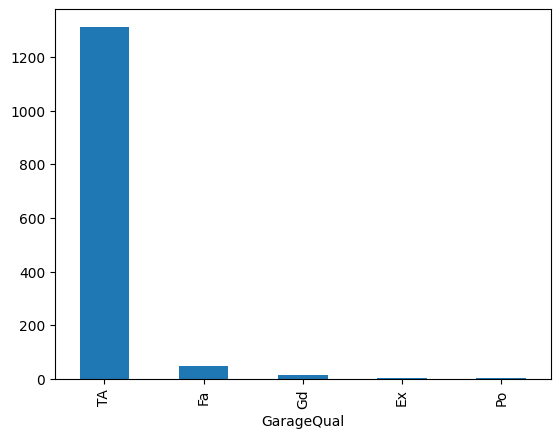

In [41]:
df['GarageQual'].value_counts().plot(kind = 'bar')

In [42]:
df['GarageQual'].mode()

,GarageQual
0,TA


### **KDE Plot | Compare Houses with TA | Null**

Text(0.5, 1.0, 'GarageQual')

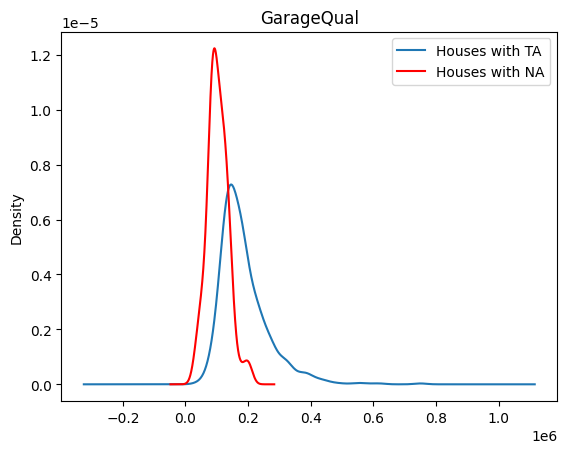

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'r')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc = 'best')

plt.title('GarageQual')

In [44]:
# Store variable TA in temp
temp = df[df['GarageQual']=='TA']['SalePrice']

In [45]:
# Replace missing value with TA
df['GarageQual'].fillna('TA', inplace=True)

<ipython-input-45-c7528ac7de84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

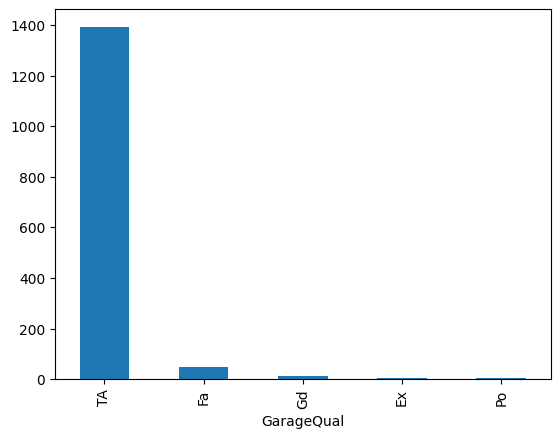

In [46]:
# Review Bar Plot Changes
df['GarageQual'].value_counts().plot(kind='bar')

### **Draw plot again | After Imputation**

Text(0.5, 1.0, 'GarageQual')

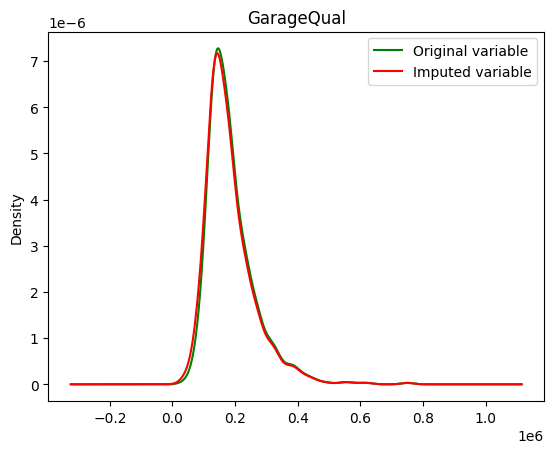

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax, color = 'green')
# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
# add title
plt.title('GarageQual')